### 모델 성능 평가를 위한 데이터셋 분리

#### 데이터셋(Dataset)
- **Train 데이터셋 (훈련/학습 데이터셋)**
    - 모델을 학습시킬 때 사용할 데이터셋.
- **Validation 데이터셋 (검증 데이터셋)**
    - 모델 하이퍼파라미터 튜닝시 모델 성능 검증을 위해 사용하는 데이터셋
    - 하이퍼파라미터 튜닝: 모델의 하이퍼파라미터를 변경하여 성능을 향상시키는 작업
- **Test 데이터셋 (평가 데이터셋)**
    - 모델의 성능을 최종적으로 측정하기 위한 데이터셋
    - **Test 데이터셋은 마지막에 모델의 성능을 측정하는 용도로 한번만 사용되야 한다.**
        - 모델을 훈련하고 성능 검증했을 때 원하는 성능이 나오지 않으면 데이터나 모델 학습을 위한 설정(하이퍼파라미터)을 수정한 뒤에 다시 훈련시키고 검증을 하게 된다. 원하는 성능이 나올때 까지 설정변경->훈련->검증을 반복하게 된다. 
        - 데이터셋을 train 세트, validation 세트, test 세트로 나눠 train set 와 validation set을 사용해 훈련과 검증을 해 모델을 최적화 한 뒤 마지막에 test set으로 최종 평가를 한다.

### Hold Out - Data분리 방식 1
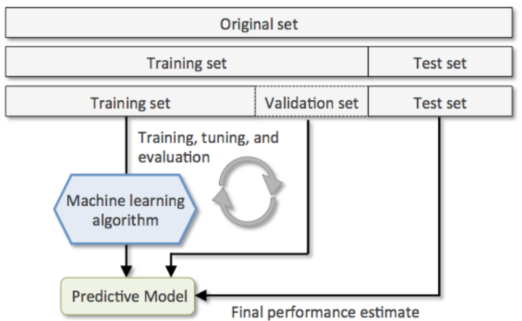
- 데이터셋을 Train set, Validation set, Test set으로 나눈다.
- sklearn.model_selection.train_test_split()  함수 사용
    - 하나의 데이터셋을 2분할 하는 함수

In [1]:
from sklearn.datasets import load_iris # load_xxxxx()

X, y = load_iris(return_X_y=True)  # iris.data와 iris.target값만 추출.  (X, y)
X.shape, y.shape

((150, 4), (150,))

### Train/Test set 분리

In [27]:
from sklearn.model_selection import train_test_split


## train_test_split(): 2개 dataset 으로 분리
X_train, X_test, y_train, y_test = train_test_split(
    X,              # input
    y,              # output 
    test_size=0.2,  # testset의 비율. default: 0.25
    stratify=y,     # 분류 데이터셋에만 적용. (y(target)이 범주형) 원본의 클래스들 비율과 동일한 비율로 나누기.
    random_state=0,  # random seed값. 나누기 전에 shuffle(섞기)을 먼저 하는 데 그때 일정하게 섞이게 하기 위해 seed값 지정.
    # shuffle=True
)
X_train.shape, X_test.shape

((120, 4), (30, 4))

In [28]:
import numpy as np
# 고유값 확인 -> 1이 3개, 2가 2개
np.unique([1, 1, 2, 1, 2], return_counts=True)

(array([1, 2]), array([3, 2]))

In [29]:
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50]))

In [30]:
import numpy as np
# y의 class별 개수
unique_values, unique_values_cnt = np.unique(y, return_counts=True)
print(unique_values, unique_values_cnt, sep='\n')
# class별 비율 계산
print(unique_values_cnt / y.size)

[0 1 2]
[50 50 50]
[0.33333333 0.33333333 0.33333333]


In [31]:
# y_train의 class별 개수
unique_values_train, unique_values_cnt_train = np.unique(y_train, return_counts=True)
print(unique_values_train, unique_values_cnt_train, sep='\n')
print(unique_values_cnt_train/y_train.size)

[0 1 2]
[40 40 40]
[0.33333333 0.33333333 0.33333333]


In [32]:
unique_values_test, unique_values_cnt_test = np.unique(y_test, return_counts=True)
print(unique_values_test, unique_values_cnt_test, sep='\n')
print(unique_values_cnt_test/y_test.size)

[0 1 2]
[10 10 10]
[0.33333333 0.33333333 0.33333333]


### Train/Validation/Test set 분리

In [33]:
### Train set을 두개로 나눠서 하나는 train, 다른 하나는 validation set으로 사용.
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, 
    test_size=0.2,
    stratify=y_train,   # stratify=output(y값, target, label) 지정.
    random_state=0)

X_train.shape, X_test.shape, X_val.shape

((96, 4), (30, 4), (24, 4))

##### 모델생성, 평가
- max_depth=정수
  - DecisionTree 모델의 하이퍼 파라미터
    > - 하이퍼 파라미터(Hyper Parameter): 모델의 성능에 영향을 주는 파라미터 값으로 사람이 직접 설정하는 값.
    > - 파라미터(Parameter): 머신러닝 모델의 파라미터. 사람이 입력하는 것이 아니라 학습을 통해서 찾는 모델의 가중치값.


In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 모델 생성
## max_depth: DecisionTree의 하이퍼 파라미터 중 하나.
# max_depth = 1
# max_depth = 2
# max_depth = 3
max_depth = 4
tree = DecisionTreeClassifier(max_depth=max_depth, random_state=0)

# 모델 학습 - trainset
tree.fit(X_train, y_train)

# 모델 검증 - validation set /train set
## 1. 예측(추론)
pred_train = tree.predict(X_train)
pred_val = tree.predict(X_val)

## 2. 평가(검증) ==> 정확도
train_acc = accuracy_score(y_train, pred_train)
val_acc = accuracy_score(y_val, pred_val)

In [35]:
## max_depth(하이퍼파라미터) 별 평가 결과 --- max_depth=1,2,3,4...
print(f"max_depth: {max_depth}")
print("Train accuracy:", train_acc)
print("Validation accuracy:", val_acc)

max_depth: 4
Train accuracy: 1.0
Validation accuracy: 1.0


#####  Testset으로 최종평가

In [37]:
max_depth = 4# validation에서 가장 성능 좋은 하이퍼파라미터 사용.
model = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
model.fit(X_train, y_train)

pred = model.predict(X_test)
test_acc = accuracy_score(y_test, pred)
print("최종 평가결과:", test_acc)

최종 평가결과: 0.9666666666666667


### Hold out 방식의 단점
- train/validation/test 셋이 어떻게 나눠 지냐에 따라 결과가 달라진다.
    - 데이터가 충분히 많을때는 변동성이 흡수되 괜찮으나 적을 경우 문제가 발생할 수 있다.
        - 이상치에 대한 영향을 많이 받는다.
        - 다양한 패턴을 찾을 수가 없기 때문에 새로운 데이터에 대한 예측 성능이 떨어지게 된다.
        
- **Hold out 방식은 (다양한 패턴을 가진) 데이터의 양이 많을 경우에 사용한다.**

### K-겹 교차검증 (K-Fold Cross Validation) - Data분리 방식 2
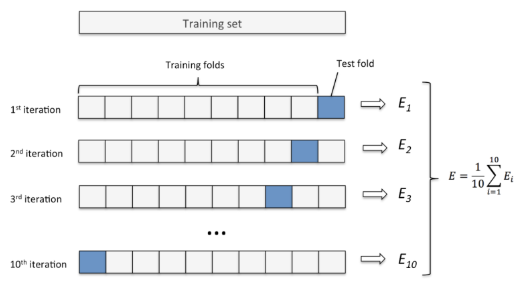
1. 데이터셋을 설정한 K 개로 나눈다.
1. K개 중 하나를 검증세트로 나머지를 훈련세트로 하여 모델을 학습시키고 평가한다. 
1. K개 모두가 한번씩 검증세트가 되도록 K번 반복하여 모델을 학습시킨 뒤 나온 평가지표들을 평균내서 모델의 성능을 평가한다.

- 데이터양이 충분치 않을때 사용한다.
- 보통 Fold를 나눌때 2.5:7.5 또는 2:8 비율이 되게 하기 위해 4개 또는 5개 fold로 나눈다. 
- scikit-learn 제공 클래스
    - **KFold**
        - 회귀문제의 Dataset을 분리할 때 사용
    - **StratifiedKFold**
        - 분류문제의 Dataset을 분리할 때 사용


> ### Boston Housing DataSet
> 미국 보스톤의 구역별 집값 데이터셋
>  - CRIM	: 지역별 범죄 발생률
>  - ZN	: 25,000 평방피트를 초과하는 거주지역의 비율
>  - INDUS: 비상업지역 토지의 비율
>  - CHAS	: 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)
>  - NOX	: 일산화질소 농도
>  - RM	: 주택 1가구당 평균 방의 개수
>  - AGE	: 1940년 이전에 건축된 소유주택의 비율
>  - DIS	: 5개의 보스턴 고용센터까지의 접근성 지수
>  - RAD	: 고속도로까지의 접근성 지수
>  - TAX	: 10,000 달러 당 재산세율
>  - PTRATIO : 지역별 교사 한명당 학생 비율
>  - B	: 지역의 흑인 거주 비율
>  - LSTAT: 하위계층의 비율(%)>  
>  - MEDV	: Target.  지역의 주택가격 중앙값 (단위: $1,000)

### KFold
- 지정한 개수(K)만큼 분할한다.
- Raw dataset의 순서를 유지하면서 지정한 개수로 분할한다.
- **회귀 문제**일 때 사용한다. 섞지 않음.
- KFold(n_splits=K)
    - 몇개의 Fold로 나눌지 지정
- KFold객체.split(데이터셋)
    - 데이터셋을 지정한 K개 나눴을때 train/test set에 포함될 데이터의 **index**들을 반환하는 generator 생성 

> - Generator란
>     - 연속된 값을 제공(생성)하는 iterable 객체. 값을 제공하는 알고리즘을 가지고 있으며 요청이 올때마다 생성되는 값을 제공한다.
>     - 함수형식으로 구현하며 return 대신 yield를 사용한다.
> ```python
> def gen():
>     yield 1
>     yield 2
>     yield 3
> ```

In [38]:
# generator
def gen(start_value):
    start_value += 10
    yield start_value

    start_value += 10
    yield start_value

    start_value += 10
    yield start_value

    start_value += 10
    yield start_value

    start_value += 10
    yield start_value

    start_value += 10
    yield start_value

    start_value += 10
    yield start_value

    start_value += 10
    yield start_value

    start_value += 10
    yield start_value

In [39]:
# generator를 생성.
a = gen(10)  
type(a)

generator

In [40]:
# generator를 호출
next(a)  # next(generator객체)
# next(iterator/generator) => iterable 객체가 가진 값(원소) 한개를 요청하는 함수.

20

In [41]:
for v in gen(100):
    print(v)

110
120
130
140
150
160
170
180
190


In [49]:
######################  
# generator 컴프리헨션
######################
l = [1, 2, 3, 4, 5]
z = (v * 100 for v in l)
# 필요한 것만 가져와서 써도 되는데 l을 호출해서 필요한걸 가져오면 메모리가 많이 잡아먹히니까
# 로직만 컴프리헨션으로 사용해서 필요한 값만 뽑아서 쓰면 메모리 훨씬 아낄 수 있겠죠 ?
# 시간은 좀 걸리는데 메모리 아끼니까 좋다요
type(z), z

(generator, <generator object <genexpr> at 0x000001FB1D69F030>)

In [47]:
## Data Loading
import pandas as pd
import numpy as np

df = pd.read_csv("data/boston_dataset.csv")
print(df.shape)
df.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [50]:
# X, y(MEDV) 를 분리
y = df['MEDV'].values
X = df.drop(columns="MEDV").values 

In [51]:
X.shape, y.shape

((506, 13), (506,))

In [52]:
y[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [53]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]], shape=(506, 13))

### KFold 예제

In [54]:
from sklearn.model_selection import KFold

# 객체 생성 - k(몇개의  fold로 나눌지 개수)를 지정
kfold = KFold(n_splits=5) # K=5 - 8 : 2 , K=4 - 7.5 : 2.5

#  K개 fold로 나눴을 때 train 데이터와 test 데이터의 index를 반환하는 generator를 생성
gen = kfold.split(X)

type(gen)

generator

In [55]:
v = next(gen)
type(v)
#튜플: (train set의 index들,   test set의 index들)

tuple

In [56]:
v

(array([102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
        115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
        128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
        141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
        154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166,
        167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179,
        180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192,
        193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205,
        206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218,
        219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231,
        232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244,
        245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257,
        258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270,
        271, 272, 273, 274, 275, 276, 277, 278, 279

### Boston housing dataset을 KFold를 이용해 학습

In [ ]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error # 오차제곱 평균.(회귀 평가지표중 하나.)
import numpy as np

### dataset: X, y (위에서 조회한 값 사용)
mse_list = []           # iteration 별 검증 결과를 저장할 리스트
kfold = KFold(n_splits=5)
gen = kfold.split(X)    # generator는 index들을 제공


for train_idx, test_idx in gen:  # tuple(trainset index: ndarray,  testset index: ndarray)
    # index를 이용해 train/test set 조회 생성.
    X_train, y_train = X[train_idx], y[train_idx]
    X_test, y_test = X[test_idx], y[test_idx]

    # 모델 생성
    model = DecisionTreeRegressor(max_depth=2, random_state=0)
    # 학습
    model.fit(X_train, y_train)
    # 검증
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred) #mean_squared_error: 회귀의 평가지표 np.mean((정답 - 추정값)**2)
    mse_list.append(mse)

In [58]:
mse_list

[19.362900914277557,
 25.77734700471067,
 58.61675649857523,
 63.188138857997195,
 41.21802825033429]

In [59]:
np.mean(mse_list), np.sqrt(np.mean(mse_list))

(np.float64(41.63263430517899), np.float64(6.452335569790136))

### StratifiedKFold
- 분류문제일 때 사용한다.
- 전체 데이터셋의 class별 개수 비율과 동일한 비율로 fold들이 나뉘도록 한다.
- StratifiedKFold(n_splits=K)
    - 몇개의 Fold로 나눌지 지정
- StratifiedKFold객체.split(X, y)
    - 데이터셋을 지정한 K개 나눴을때 train/test set에 포함될 데이터의 index들을 반환하는 generator 생성
    - input(X)와 output(y) dataset을  전달한다. 

In [60]:
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)

In [65]:
# k를 지정해서 객체 생성
sf = StratifiedKFold(n_splits=5)
# 나누기
s_gen = sf.split(X, y)  # input, output data 모두 제공.
print(type(s_gen))
train_idx, valid_idx = next(s_gen)
print(train_idx)
print(valid_idx)
print(y[train_idx])
print(y[valid_idx])

<class 'generator'>
[ 10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27
  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]
[  0   1   2   3   4   5   6   7   8   9  50  51  52  53  54  55  56  57
  58  59 100 101 102 103 104 105 106 107 108 109]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]


In [66]:
np.unique(y[train_idx], return_counts=True)
np.unique(y[valid_idx], return_counts=True)

(array([0, 1, 2]), array([10, 10, 10]))

In [86]:
s_kfold = StratifiedKFold(n_splits=4)
s_gen = s_kfold.split(X, y)

# fold별 검증 결과를 저장할 리스트
val_result = []
for train_idx, test_idx in s_gen:

    # data 추출
    X_train, y_train = X[train_idx], y[train_idx]
    X_test, y_test = X[test_idx], y[test_idx]

    # 모델링
    ## 모델 생성
    # max_depth = 1
    # max_depth = 2
    # max_depth = 3
    # max_depth = 4
    max_depth = 5
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    ## 학습
    model.fit(X_train, y_train)
    ## 검증
    pred = model.predict(X_test)
    val_result.append(accuracy_score(y_test, pred))

In [87]:
val_result

[0.9736842105263158, 0.9473684210526315, 0.9459459459459459, 1.0]

In [88]:
# 가장 valid 결과가 좋은 하이퍼파라미터로 모델을 만들어서 다시 학습.
final_model = DecisionTreeClassifier(max_depth=5, random_state=0)
final_model.fit(X, y)

DecisionTreeClassifier(max_depth=5, random_state=0)

### cross_val_score( )
- 교차검증을 처리하는 함수.
    - 데이터셋을 K개로 나누고 K번 반복하면서 평가하는 작업을 처리해 주는 함수
    - 평가 지표를 **하나만** 사용할 수있다.
- 주요매개변수
    - estimator: 모델객체
    - X: feature
    - y: label
    - scoring: 평가자. 문자열, 함수
    - cv: 나눌 개수 (K)
        - 정수: 개수
        - KFold 타입 객체
- 반환값: array - 각 반복마다의 평가점수

> 평가지표: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [89]:
## Boston Dataset
import pandas as pd
df = pd.read_csv('data/boston_dataset.csv')
y = df['MEDV'].values
X = df.drop(columns="MEDV").values
X.shape, y.shape

((506, 13), (506,))

In [100]:
## train/test set 분리 (최종 평가 위해서)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [101]:
## cross validation(교차검증) - cross_val_score() 이용
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=2, random_state=0)
val_results = cross_val_score(
    estimator=model, # 교차검증할 모델
    X=X_train,       # X-input, features
    y=y_train,       # y-output, target, label
    scoring="neg_mean_squared_error",  # 평가지표함수-문자열, 함수객체
    cv=4,            # fold 수
)
print(val_results)
print(-val_results)
print(-val_results.mean())

[-25.325642   -25.07376354 -42.7879561  -42.4207859 ]
[25.325642   25.07376354 42.7879561  42.4207859 ]
33.90203688337762


In [102]:
##### 모델링 - 하이퍼파라미터 튜닝을 통해서 가장 성능 좋은 모델을 찾기.
## 하이퍼파라미터 - max_depth
max_depth_list = [1, 2, 3, 4, 5]
# max_depth별 모델의 검증 결과를 저장할 딕셔너리. key: max_depth, scores, mean_score
results = {"max_depth":[], "scores":[], "mean_score":[]}  
for max_depth in max_depth_list:
    model = DecisionTreeRegressor(max_depth=max_depth, random_state=0)
    # 교차검증을 이용해 성능 평가.
    scores = cross_val_score(
        estimator=model,
        X=X_train, 
        y=y_train,
        scoring="neg_mean_squared_error", 
        cv=4
    )
    # 결과 dictionary에 저장
    results['max_depth'].append(max_depth)
    results['scores'].append(scores)
    results['mean_score'].append(np.mean(scores).item())  # ndarray의 0차원 값을 파이썬 값으로 추출

In [105]:
results

{'max_depth': [1, 2, 3, 4, 5],
 'scores': [array([-45.89379405, -40.67507482, -71.05002262, -55.33355572]),
  array([-25.325642  , -25.07376354, -42.7879561 , -42.4207859 ]),
  array([-15.89637347, -24.77699693, -49.78552275, -25.01324593]),
  array([-12.560709  , -16.50424255, -49.41891582, -20.55564482]),
  array([-11.13574744, -18.13445467, -52.99608118, -14.40992532])],
 'mean_score': [-53.23811180112813,
  -33.90203688337762,
  -28.868034772038833,
  -24.759878046646527,
  -24.169052153115132]}

In [106]:
results["mean_score"]

[-53.23811180112813,
 -33.90203688337762,
 -28.868034772038833,
 -24.759878046646527,
 -24.169052153115132]

In [107]:
####### max_depth가 5일 때 검증결과가 가장 좋음.
### 최종 모델을 max_depth=5 해서 만들고 학습.
best_model = DecisionTreeRegressor(max_depth=5, random_state=0)
best_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [108]:
### test set으로 최종 평가
from sklearn.metrics import mean_squared_error
pred_test = best_model.predict(X_test)
mean_squared_error(y_test, pred_test)

32.0407432413041

### cross_validate()
- 교차검증을 처리하는 함수.
    - 데이터셋을 K개로 나누고 K번 반복하면서 평가하는 작업을 처리해 주는 함수
    - 평가 지표를 **여러개** 사용할 수있다.
- 주요매개변수
    - estimator: 모델객체
    - X: feature
    - y: label
    - scoring: 평가지표. 문자열, 함수, 리스트(여러개일 때는 **리스트**로 묶어준다.)
    - cv: 나눌 개수 (K)
        - 정수: 개수
        - KFold 타입 객체
- 반환값: dictionary

In [109]:
## 회귀 평가지표 - mse, r-square
from sklearn.model_selection import cross_validate, cross_val_score, KFold, StratifiedKFold, train_test_split
model2 = DecisionTreeRegressor(max_depth=5)

result_dict = cross_validate(
    estimator=model2, # 모델지정
    X=X_train,
    y=y_train,   # input/output dataset 지정
    scoring=["neg_mean_squared_error", "r2", "neg_mean_absolute_error"], 
    # scoring="neg_mean_squared_error",
    cv=4
)

In [110]:
result_dict.keys()
# 'fit_time' : 학습할때 걸린 시간
# 'score_time': 검증할 때 걸린 시간
# 'test_neg_mean_squared_error', 'test_r2'   : 검증 결과

dict_keys(['fit_time', 'score_time', 'test_neg_mean_squared_error', 'test_r2', 'test_neg_mean_absolute_error'])

In [111]:
result_dict

{'fit_time': array([0., 0., 0., 0.]),
 'score_time': array([0.        , 0.01366043, 0.00817871, 0.        ]),
 'test_neg_mean_squared_error': array([-11.13574744, -17.23712794, -55.94892177, -15.38517285]),
 'test_r2': array([0.86750332, 0.73043523, 0.36438976, 0.85104042]),
 'test_neg_mean_absolute_error': array([-2.61152839, -2.96319701, -3.96487468, -2.71577491])}

In [112]:
result_dict['test_neg_mean_squared_error']

array([-11.13574744, -17.23712794, -55.94892177, -15.38517285])